In [1]:
#!pip install scikit-learn

In [2]:
# Correlation function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy 
from scipy import signal
#import scipy.signal
from matplotlib.pyplot import figure

Nsample  = 10000
dt = 1/100  # time step  => 
time = np.arange(Nsample)*dt

# create an 1D array populated with random samples 
mu = 0
sigma = .5 # scale
eta = sigma * np.random.randn(Nsample) + mu

# Simulate a Cosine wave
k0 = 1 # phase
k1 = 1 
k2 = 3
xi = np.cos(k1*time-k0*np.pi/2)
xii = np.cos(k2*time-k0*np.pi)
xi  =  xi + xii + eta # corrupted signal

In [3]:
# Compute numerically the autocorrelation via a Fourier transform
fft_cor = scipy.signal.fftconvolve(xi, xi[::-1])[Nsample-1:]
fft_cor /= (Nsample - np.arange(Nsample))

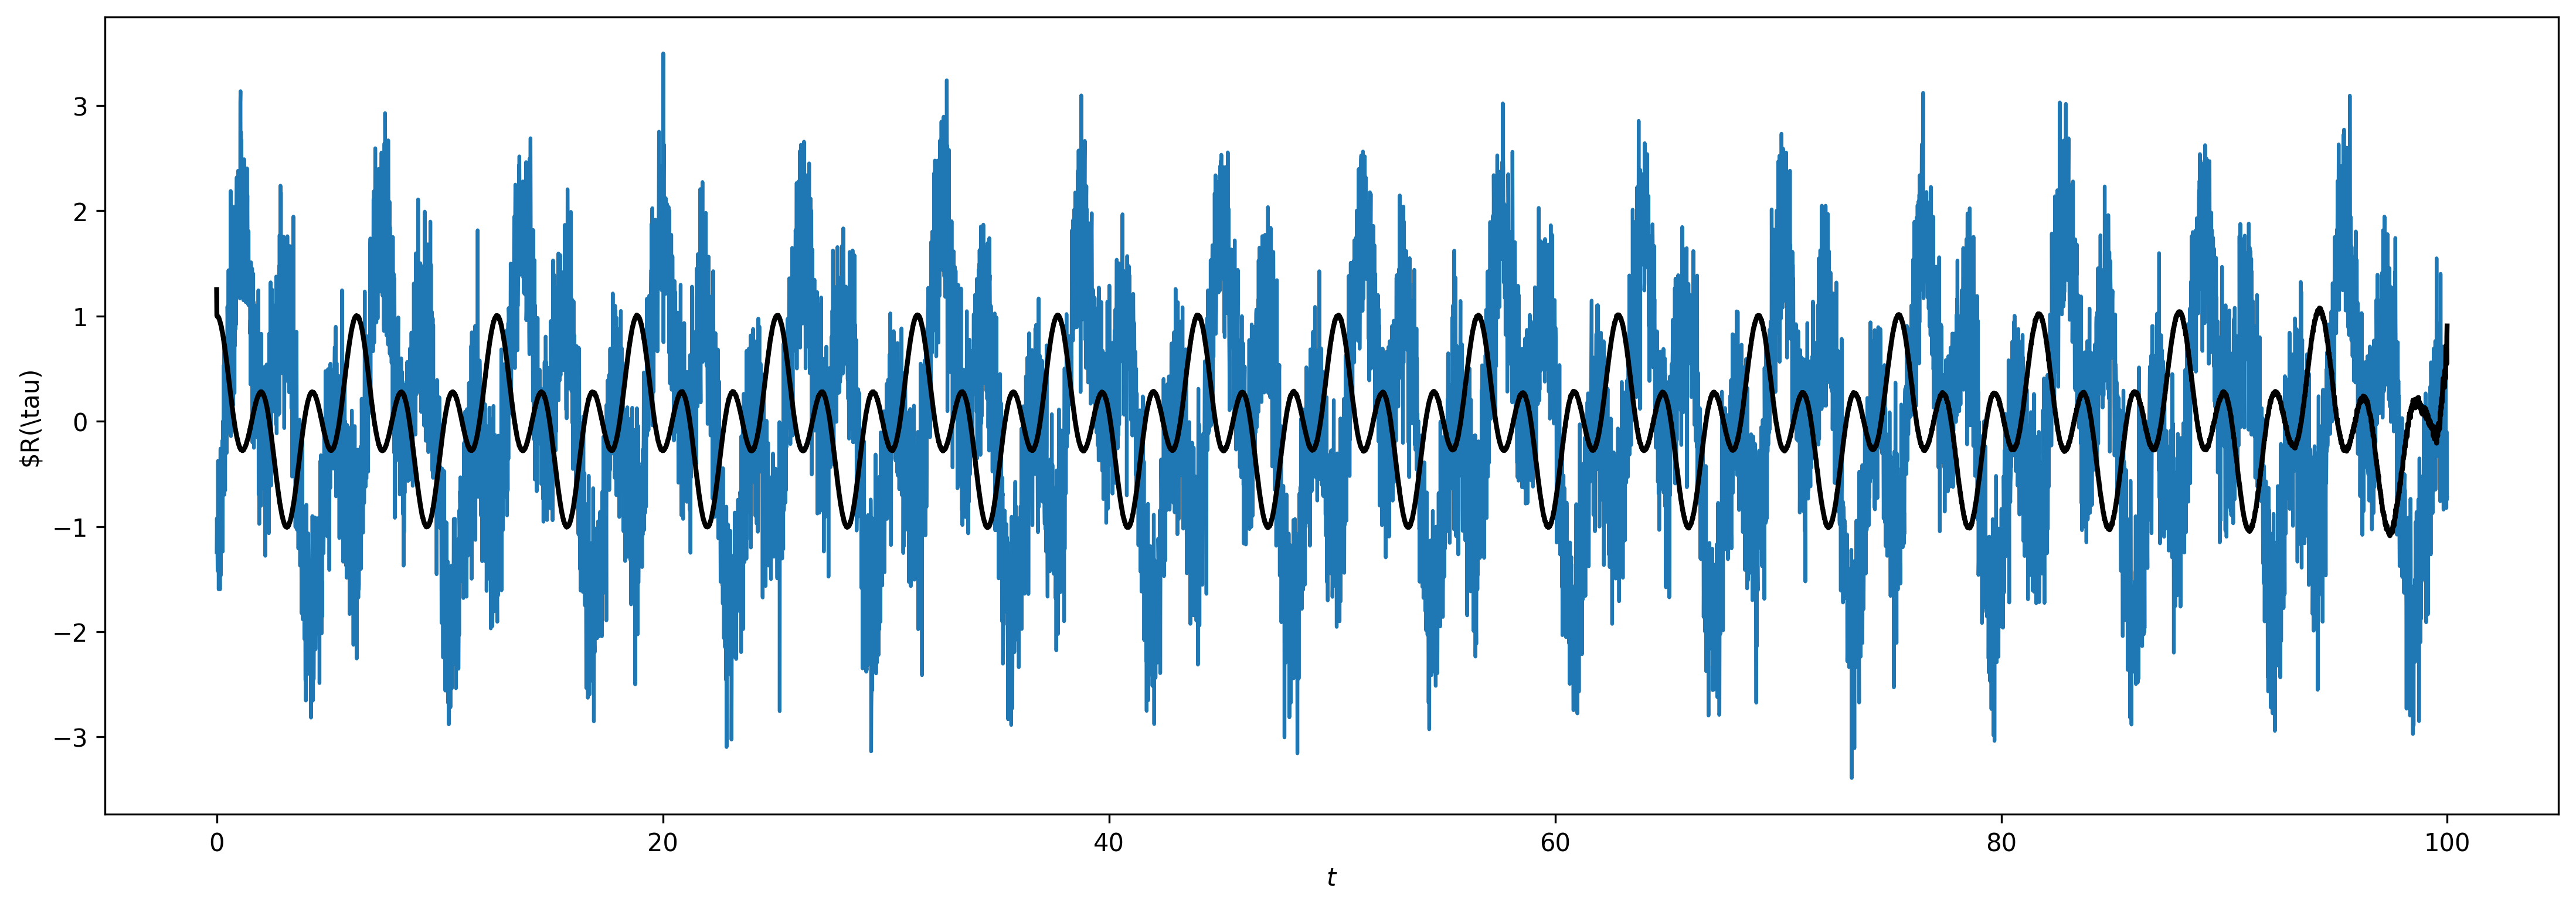

In [4]:
figure(figsize=(18, 6), dpi=300)
plt.plot(time,xi) 
plt.xlabel(r'$t$')
plt.ylabel(r'$R(\tau)'); 
plt.plot(time, fft_cor, 'k-', lw=2)

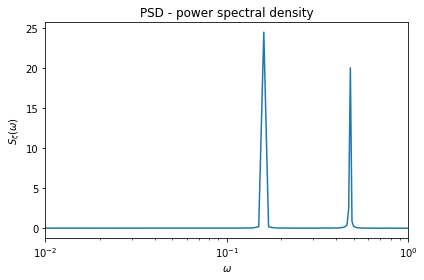

In [5]:
# Compute the FFT with proper units
S_v = np.fft.fft(xi)*dt
psd = (S_v*S_v.conjugate()).real # power spectrum
psd[Nsample//2] = np.nan # to avoid the crossing from -infinity to infinity
T = Nsample*dt
# The psd is defined per unit time, so 1/T normalizes the result
plt.semilogx(np.fft.fftfreq(Nsample, dt), psd/T)
# Analytical value
freqs = np.linspace(0, 3, len(psd))
plt.title('PSD - power spectral density')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S_\xi(\omega)$')
plt.xlim([dt, 1])
plt.tight_layout()